# Лабортарная работа №3

## Салятов Сергей, Подосенов Андрей, M3337

### Задание 1 (Вариант 4)

Даны независимые выборки $X, Y$ из нормальных распределениий $N(\mu_1, \sigma_1^2)$,  $N(\mu_2, \sigma_2^2)$ объёма $n, m$ соотвественно. 

Оценить $\tau = \frac{\sigma_1^2}{\sigma_2^2}$ при изместных $\mu_1$ и $\mu_2$.

Для решения воспользуемся вспомогательной функцией 

$$
T = \frac{\displaystyle\sum_{i=1}^n (X_i - \mu_1)^2 / n}{\displaystyle\sum_{i=1}^m (Y_i - \mu_2)^2 / m}
$$

Домножим и поделим в числителе на $\sigma_1^2$, в знаменателе на $\sigma_2^2$. Множители $\displaystyle\frac{1}{\sigma_i^2}$ занесём под знак суммы. Получаем:

$$
T = \frac{\displaystyle\sum_{i=1}^n \frac{(X_i - \mu_1)^2}{\sigma_1^2} / n}{\displaystyle\sum_{i=1}^m \frac{(Y_i - \mu_2)^2}{\sigma_2^2} / m} \cdot \frac{\sigma_1^2}{\sigma_2^2} = \frac{\displaystyle\sum_{i=1}^n \left( \frac{X_i - \mu_1}{\sigma_1} \right)^2 / n}{\displaystyle\sum_{i=1}^m \left( \frac{Y_i - \mu_2}{\sigma_2} \right)^2 / m} \cdot \tau
$$

Тогда

$$
\frac{T}{\tau} = \frac{\displaystyle\sum_{i=1}^n \left( \frac{X_i - \mu_1}{\sigma_1} \right)^2 / n}{\displaystyle\sum_{i=1}^m \left( \frac{Y_i - \mu_2}{\sigma_2} \right)^2 / m} \sim \frac{\chi_n^2 / n}{\chi_m^2 / m} \sim F(n, m) 
$$

Переход к $\chi^2_{n,m}$ был осуществлён, так как

$$\frac{X_i - \mu_1}{\sigma_1} \sim N(0, 1)$$

$$\frac{Y_i - \mu_2}{\sigma_2} \sim N(0, 1)$$

и тогда у нас получается и в числителе, и в знаменателе сумма квадратов стандартных нормальных распределений, что и является распределением $\chi^2$ с соответствующими степенями свободы. 

Отношение дробей $\chi_n^2 / n$ и $\chi_m^2 / m$ является распределением Фишера со степенями свободы $n$ и $m$ $F(n, m)$.

Далее через квантили $q_{\alpha/2}$ и $q_{1 - \alpha/2}$ для распределения Фишера $F(n, m)$ можем найти доверительный интервал уровня надёжности $1 - \alpha$ для $\tau$:

$$
P \left( q_{\alpha/2} \leq \frac{T}{\tau} \leq q_{1 - \alpha/2} \right) = 1- \alpha
$$

Отсюда

$$
\frac{T}{q_{1 - \alpha/2}} \leq \tau \leq \frac{T}{q_{\alpha/2}}
$$

In [29]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

np.random.seed(42)  # Для воспроизводимости
alpha = 0.05
tau_true = 2.0  # Реальное значение τ = σ₁²/σ₂² = 2/1

# Функция для расчёта покрытия и средней ширины интервала
def calculate_coverage_and_width(n, m, num_experiments=1000):
    coverage_count = 0
    total_width = 0.0
    
    for _ in range(num_experiments):
        # Генерируем выборки
        X = np.random.normal(0, np.sqrt(2), n)  # σ₁² = 2
        Y = np.random.normal(0, 1, m)           # σ₂² = 1
        
        # Вычисляем статистику T
        T = (m * np.sum(X**2)) / (n * np.sum(Y**2))
        
        # Квантили F-распределения
        F_high = f.ppf(1 - alpha/2, n, m)  # Верхняя квантиль
        F_low = f.ppf(alpha/2, n, m)       # Нижняя квантиль
        
        # Границы доверительного интервала
        lower = T / F_high
        upper = T / F_low
        
        # Считаем ширину интервала
        width = upper - lower
        total_width += width
        
        # Проверяем покрытие
        if lower <= tau_true <= upper:
            coverage_count += 1
    
    coverage = coverage_count / num_experiments
    avg_width = total_width / num_experiments
    return coverage, avg_width

# Запускаем эксперименты
print("Для n = m = 25:")
coverage25, width25 = calculate_coverage_and_width(25, 25, num_experiments=1000)
print(f"Покрытие: {coverage25:.4f}")
print(f"Средняя ширина интервала: {width25:.4f}")

print("\nДля n = m = 10000:")
coverage10k, width10k = calculate_coverage_and_width(10000, 10000, num_experiments=100)
print(f"Покрытие: {coverage10k:.4f}")
print(f"Средняя ширина интервала: {width10k:.6f}")

Для n = m = 25:
Покрытие: 0.9580
Средняя ширина интервала: 3.8829

Для n = m = 10000:
Покрытие: 0.9700
Средняя ширина интервала: 0.156666


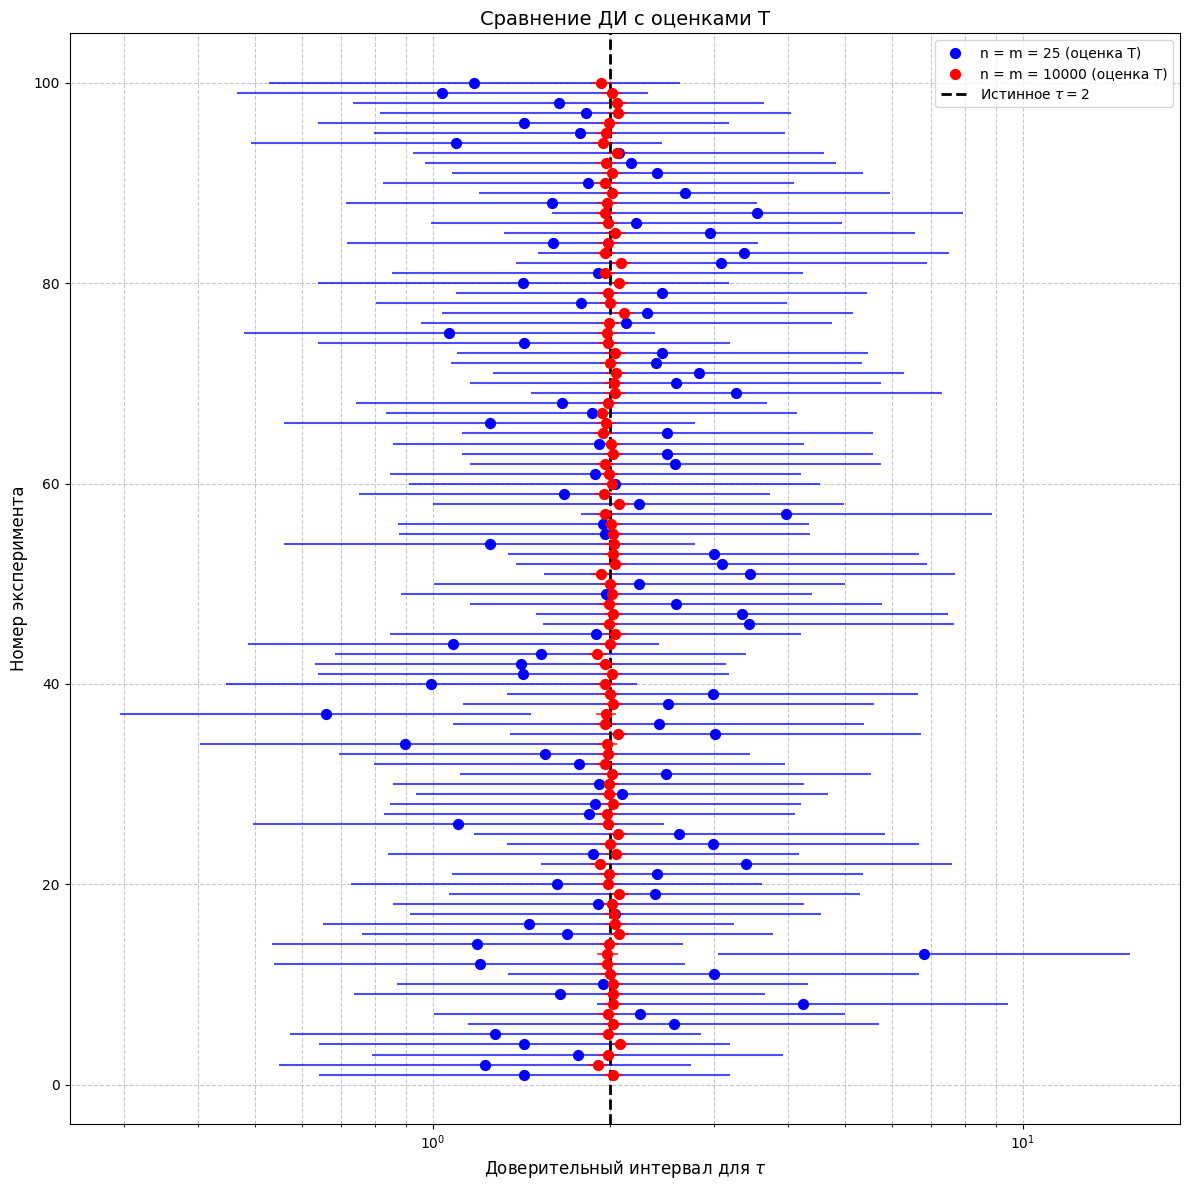

In [31]:
# Функция, возвращающая (нижняя граница, верхняя граница, оценка T)
def get_interval_with_T(n, m):
    X = np.random.normal(0, np.sqrt(2), n)
    Y = np.random.normal(0, 1, m)
    T = (m * np.sum(X**2)) / (n * np.sum(Y**2))
    F_low = f.ppf(alpha/2, n, m)
    F_high = f.ppf(1-alpha/2, n, m)
    lower = T / F_high
    upper = T / F_low
    return lower, upper, T  # Возвращаем оценку T

# Генерируем данные
num_intervals = 100
intervals_small = [get_interval_with_T(25, 25) for _ in range(num_intervals)]
intervals_large = [get_interval_with_T(10000, 10000) for _ in range(num_intervals)]

# Извлекаем компоненты для графика
lower_small = [lo for lo, _, _ in intervals_small]
upper_small = [hi for _o, hi, _ in intervals_small]
T_small = [T for _, _, T in intervals_small]

lower_large = [lo for lo, _, _ in intervals_large]
upper_large = [hi for _, hi, _ in intervals_large]
T_large = [T for _, _, T in intervals_large]

y_small = np.arange(num_intervals, 0, -1)
y_large = y_small

plt.figure(figsize=(12, 12))

# Малые выборки (n=m=25)
plt.hlines(y_small, lower_small, upper_small, color='blue', alpha=0.7, linewidth=1.5)
plt.scatter(T_small, y_small, color='blue', s=50, zorder=5, label='n = m = 25 (оценка T)')

# Большие выборки (n=m=10000)
plt.hlines(y_large, lower_large, upper_large, color='red', alpha=0.7, linewidth=1.5)
plt.scatter(T_large, y_large, color='red', s=50, zorder=5, label='n = m = 10000 (оценка T)')

# Истинное значение
plt.axvline(tau_true, color='k', linestyle='--', linewidth=2, label=r'Истинное $\tau = 2$')

# Настройки графика
plt.xscale('log')
plt.xlabel('Доверительный интервал для $\\tau$', fontsize=12)
plt.ylabel('Номер эксперимента', fontsize=12)
plt.title('Сравнение ДИ с оценками T', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()
plt.show()

В обоих случаях ($n = m = 25$ и $n = m = 10000$) покрытие около 95%. В первом случае оценка менее точная, но и интервал широкий. Во втором - оценка точнее, но интервал узкий. Покрытие 95% объясняется тем, что это точный доверительный интервал через распределение Фишера, а не асимптотический. 